# Iris Flower Clasification

It's a machine learning application for accurate flower identification and classification. The dataset includes 150 records of three Iris species: Setosa, Virginica, and Versicolor, each with 50 samples. Four measurements (sepal and petal length and width) are recorded in centimeters. <br >Our project aims to build a model for precise species classification using these attributes.

# Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

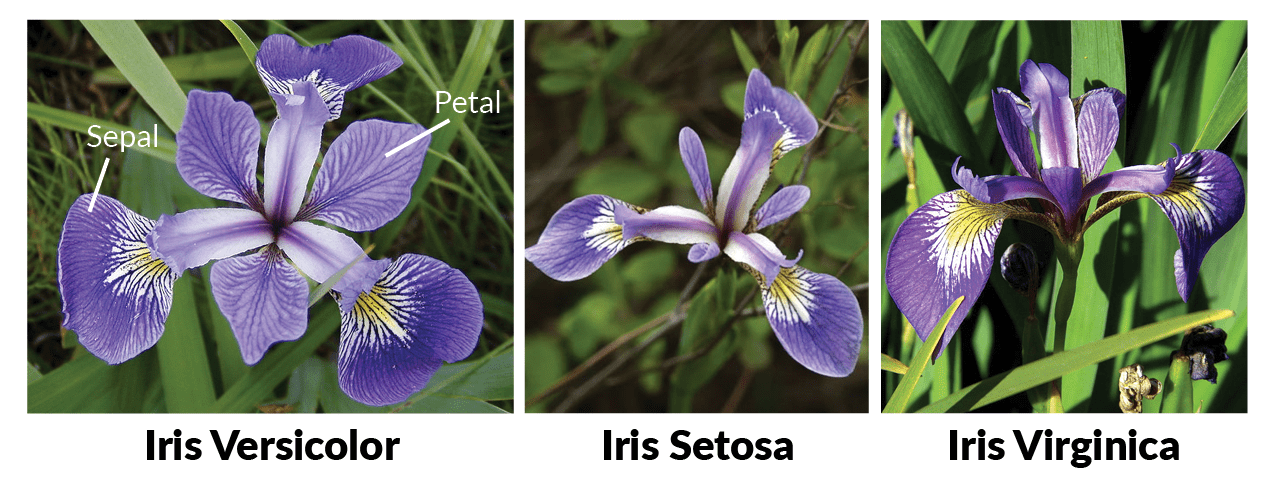

In [2]:
from IPython.display import Image
Image("iris.png")

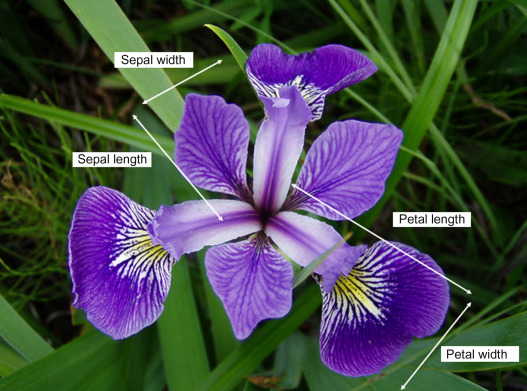

In [3]:
Image("irisd.jpg")

In [4]:
df = pd.read_csv('IRIS.csv')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data Understanding

In [6]:
df.shape

(150, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df.duplicated().all()

False

The dataset is clean, containing no null or duplicate values, ensuring data integrity.

In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


By describe we obtain the minimum and maximum measurements of sepal and petal length and width.

# EDA & Data Visualization

In [11]:
unique_species = df['species'].nunique()
print("Number of unique species:", unique_species)

Number of unique species: 3


In [12]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
species_counts = df['species'].value_counts()
print(species_counts)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


In [14]:
df[df['species'] =='Iris-setosa'].head()   #df[0:50]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
df[df['species'] =='Iris-versicolor'].head()   #df[51:100]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [16]:
df[df['species'] =='Iris-virginica'].head()   #df[101:151]

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


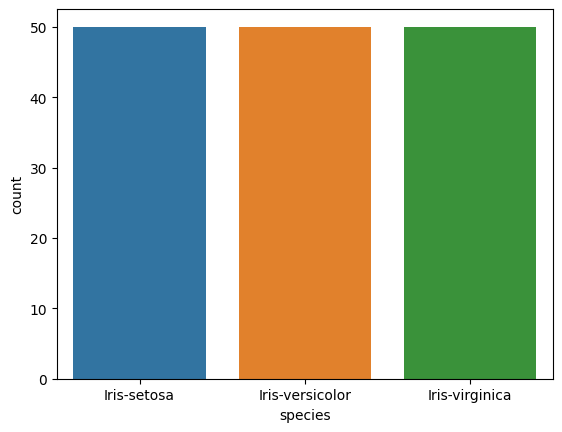

In [17]:
sns.countplot(data = df,x = 'species')
plt.show()

The dataset is equally distributed and balanced between each species.

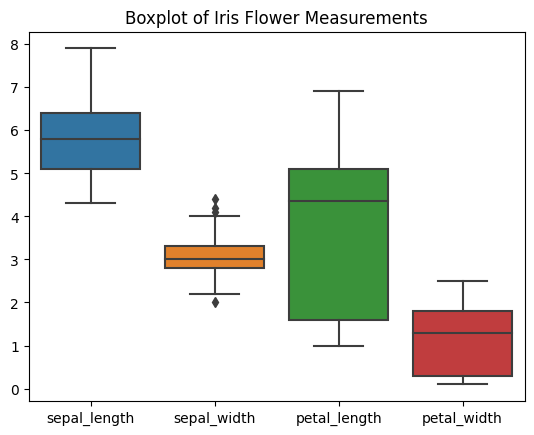

In [18]:
sns.boxplot(data=df)
plt.title("Boxplot of Iris Flower Measurements")
plt.show()

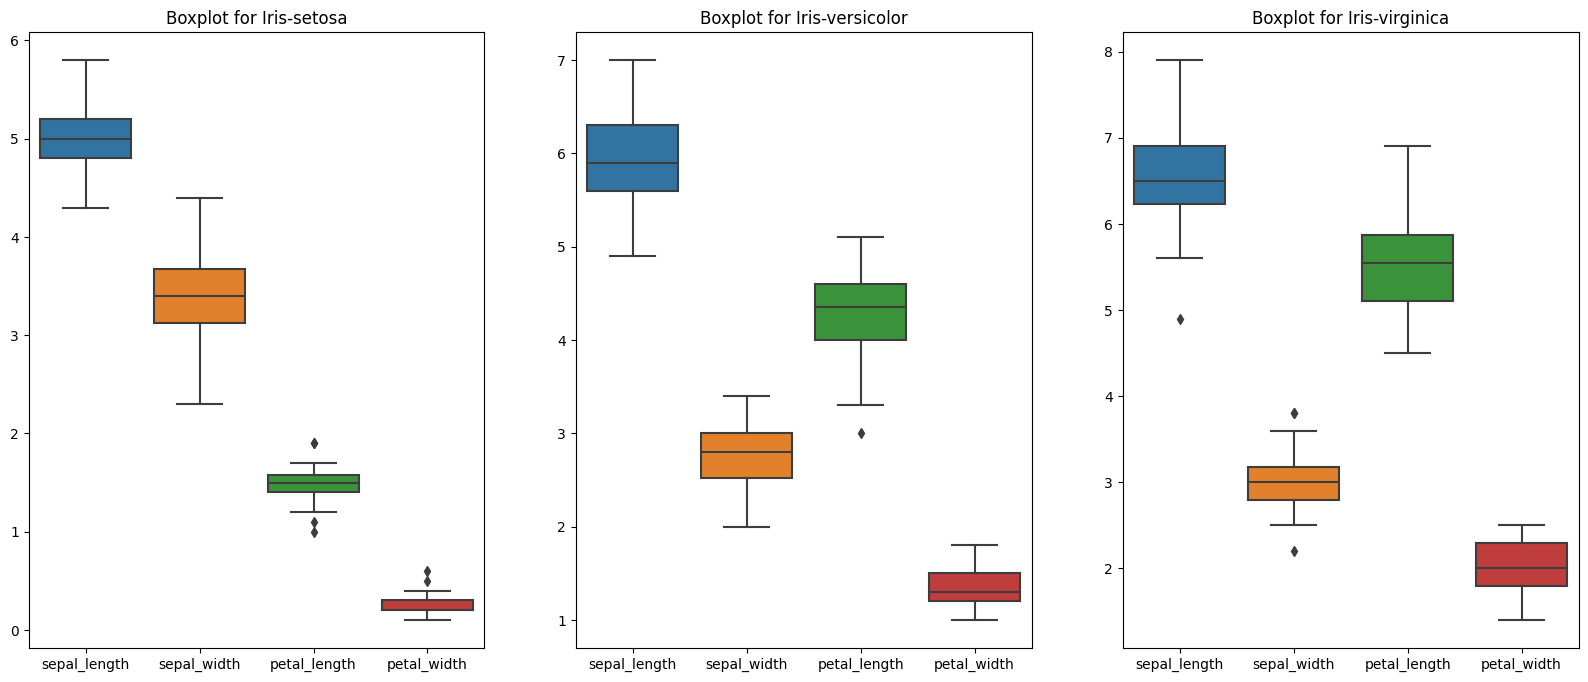

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for i, spec in enumerate(species):
    iris_data = df[df['species'] == spec]
    
    sns.boxplot(data=iris_data, ax=axes[i])
    axes[i].set_title(f'Boxplot for {spec}')

plt.show()

The boxplot reveals the presence of outliers in the dataset.

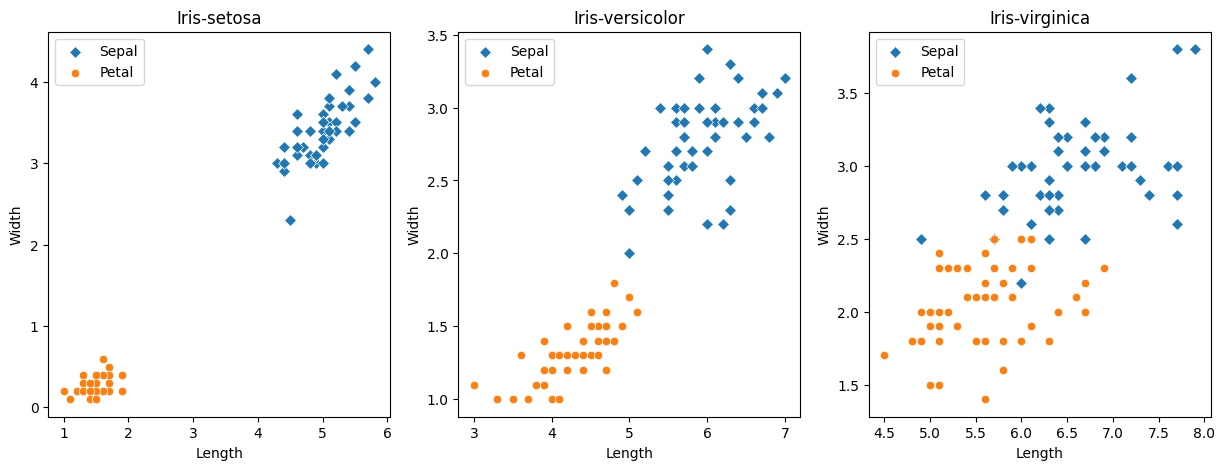

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for i, spec in enumerate(species):
    iris_data = df[df['species'] == spec]
    
    sns.scatterplot(x=iris_data['sepal_length'], y=iris_data['sepal_width'], label='Sepal', ax=axes[i], marker='D')
    
    sns.scatterplot(x=iris_data['petal_length'], y=iris_data['petal_width'], label='Petal', ax=axes[i])
    
    axes[i].set_title(f'{spec}')
    axes[i].set_xlabel('Length')
    axes[i].set_ylabel('Width')
    axes[i].legend()

plt.show()


The scatterplot indicates a positive correlation between the length and width of the species.

**How do the average sepal and petal measurements vary among the three Iris species?**

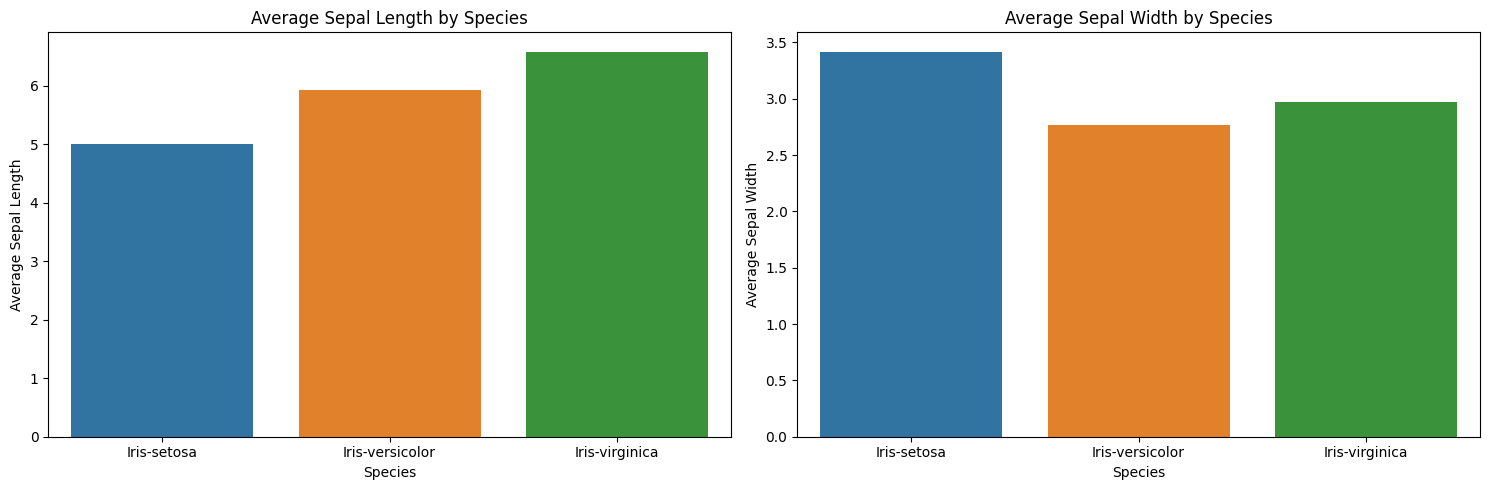

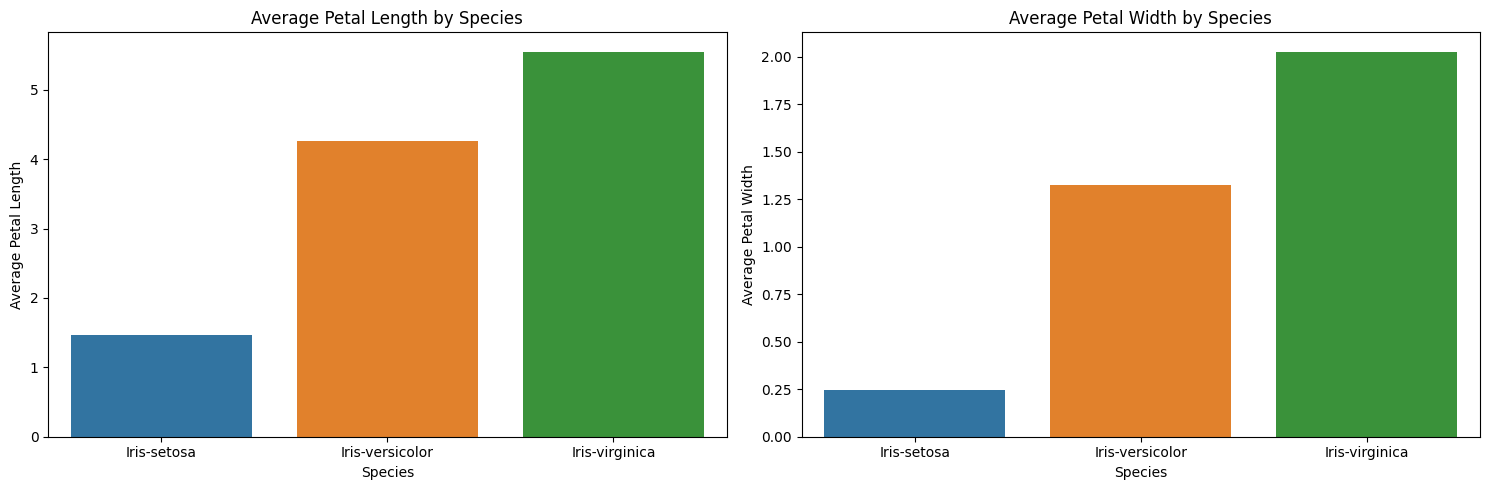

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

averages = df.groupby('species')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(data=averages, x='species', y='sepal_length',ax=axes[0])
axes[0].set_title('Average Sepal Length by Species')
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Average Sepal Length')

sns.barplot(data=averages, x='species', y='sepal_width', ax=axes[1])
axes[1].set_title('Average Sepal Width by Species')
axes[1].set_xlabel('Species')
axes[1].set_ylabel('Average Sepal Width')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(data=averages, x='species', y='petal_length', ax=axes[0])
axes[0].set_title('Average Petal Length by Species')
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Average Petal Length')

sns.barplot(data=averages, x='species', y='petal_width', ax=axes[1])
axes[1].set_title('Average Petal Width by Species')
axes[1].set_xlabel('Species')
axes[1].set_ylabel('Average Petal Width')

plt.tight_layout()
plt.show()

**What are the frequency distributions of the numeric attributes within the Iris dataset?**

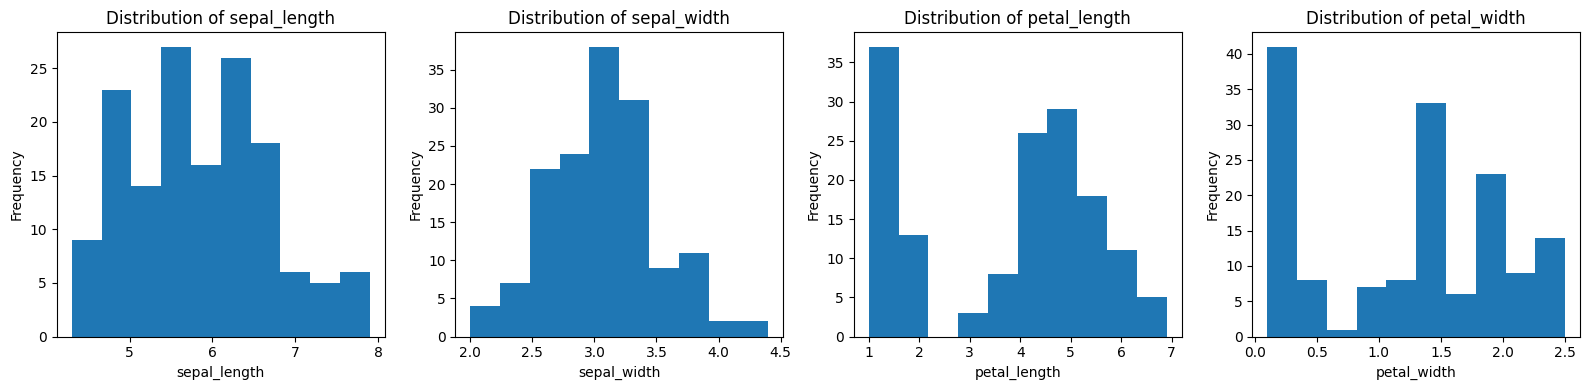

In [22]:
numeric_cols = df.select_dtypes(include='number')
n_cols = numeric_cols.shape[1]

fig, axes = plt.subplots(1, n_cols, figsize=(16, 4))

for col, ax in zip(numeric_cols.columns, axes):
    numeric_cols[col].plot(kind='hist', ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

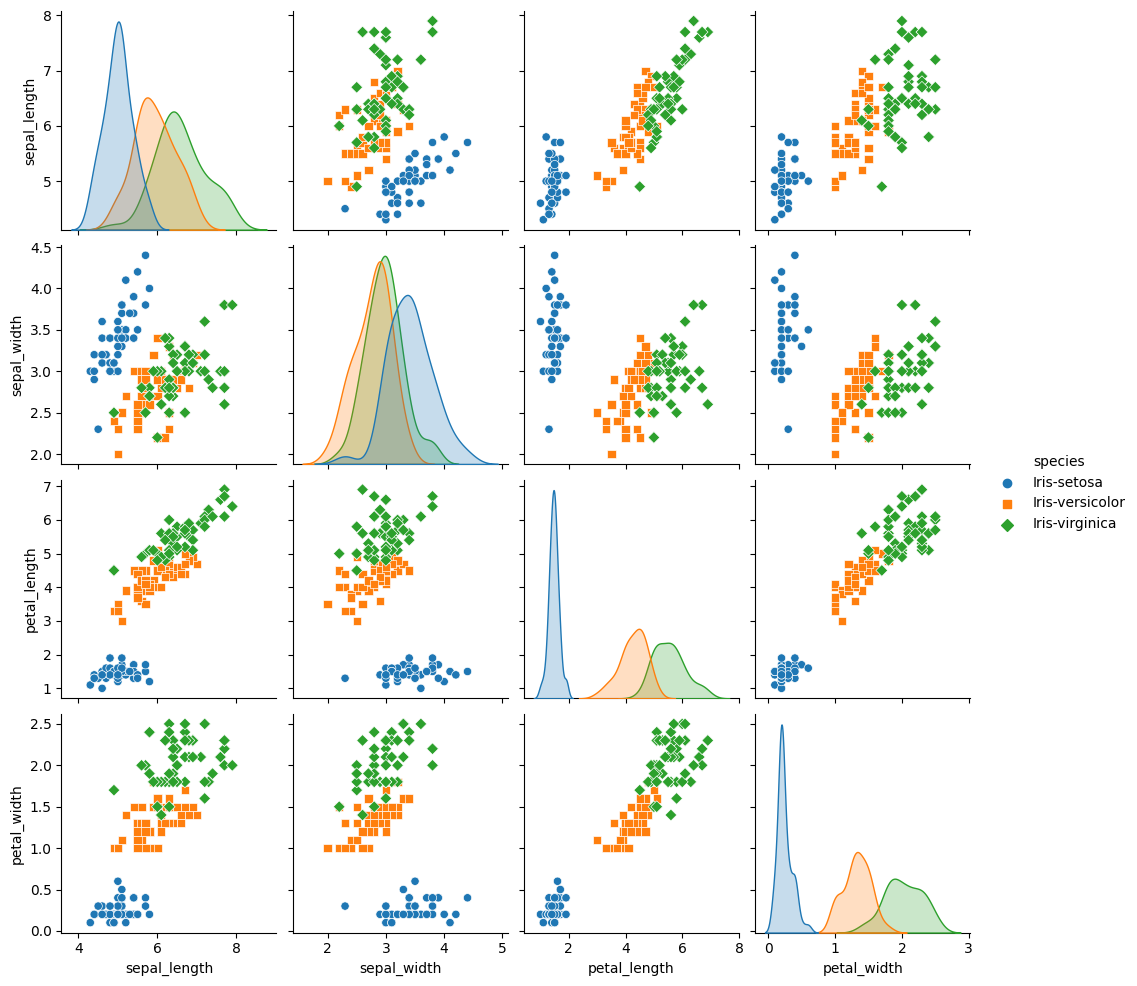

In [23]:
sns.pairplot(df, hue="species", markers=["o", "s", "D"])
plt.show()

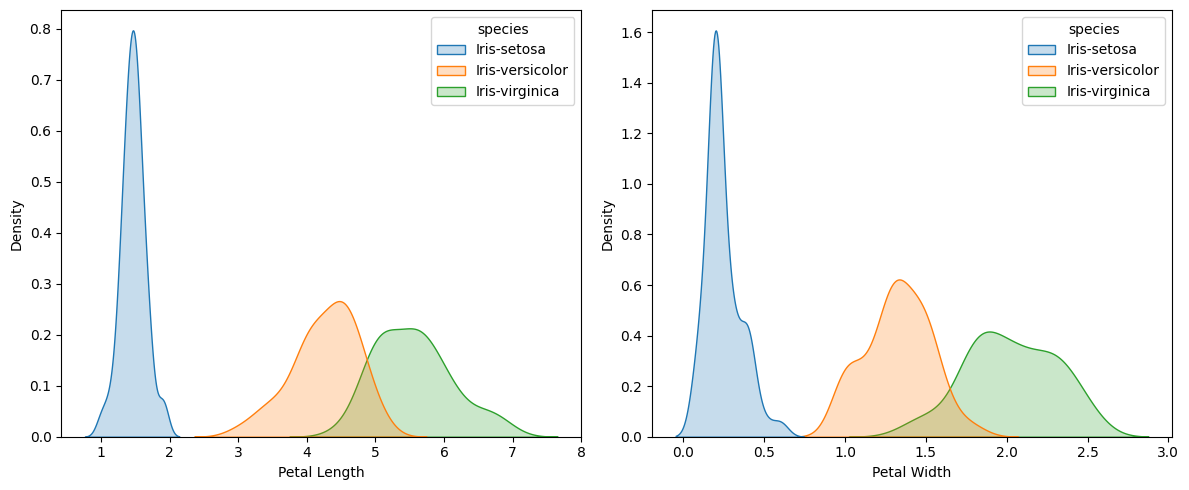

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(data=df, x="petal_length", hue="species", fill=True, ax=axes[0])
axes[0].set_xlabel("Petal Length")

sns.kdeplot(data=df, x="petal_width", hue="species", fill=True, ax=axes[1])
axes[1].set_xlabel("Petal Width")

plt.tight_layout()
plt.show()

From the KDE plot, it is evident that petal length and width are higher for the setosa species.

<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

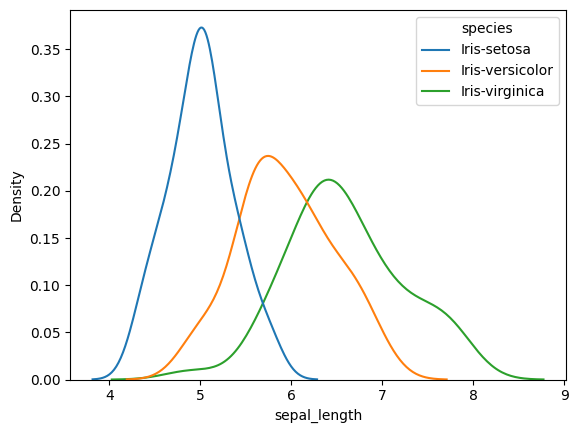

In [25]:
sns.kdeplot(data = df, x= "sepal_length",hue = "species",)

<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

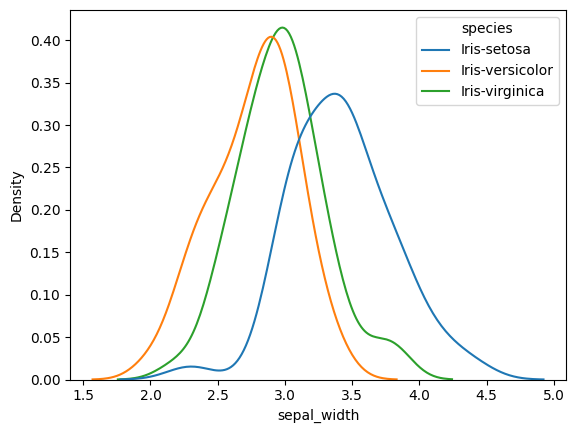

In [26]:
sns.kdeplot(data = df, x= "sepal_width",hue = "species")

In [27]:
subset = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
subset.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


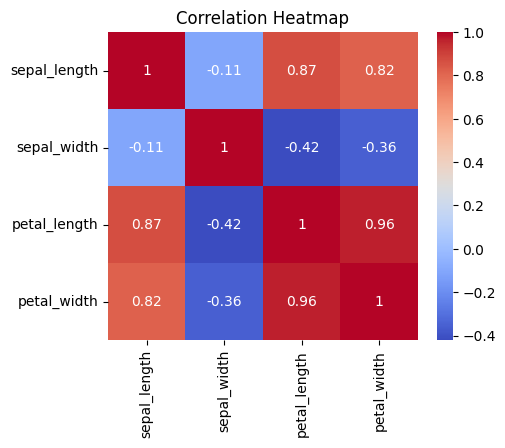

In [28]:
subset = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
correlation_matrix = subset.corr()

plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Data Preprocessing

In [29]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
df['species'] = df['species'].apply(lambda name: name.replace("Iris-", ""))

In [31]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**converting Categorical data**

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [34]:
df['species'].unique()

array([0, 1, 2])

In [35]:
X = df.drop("species",axis  = 1)
Y = df['species']

In [36]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

In [38]:
X.shape

(150, 4)

In [39]:
Y.shape

(150,)

Now our data is ready for train the model.

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state= 25)

In [42]:
X_train.shape

(120, 4)

In [43]:
X_test.shape

(30, 4)

In [44]:
print("Training Dataset:")
print("X (features) for training:", X_train.shape)
print("Y (labels) for training:", Y_train.shape)
print()

print("Testing Dataset:")
print("X (features) for testing:", X_test.shape)
print("Y (labels) for testing:", Y_test.shape)

Training Dataset:
X (features) for training: (120, 4)
Y (labels) for training: (120,)

Testing Dataset:
X (features) for testing: (30, 4)
Y (labels) for testing: (30,)


# Model Selection

In [45]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score

**Support Vector Machine**

In [46]:
model1 = SVC()
model1.fit(X_train,Y_train)

SVC()

In [47]:
Y_pred1 = model1.predict(X_test)

In [48]:
print(classification_report(Y_test,Y_pred1))
print("Accuracy Score:",round(accuracy_score(Y_test,Y_pred1)*100,2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy Score: 96.67


**Decision Tree**

In [49]:
model2 = DecisionTreeClassifier()
model2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [50]:
Y_pred2 = model2.predict(X_test)

In [51]:
print(classification_report(Y_test,Y_pred2))
print("Accuracy Score:",round(accuracy_score(Y_test,Y_pred2)*100,2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      0.92      0.92        13
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Accuracy Score: 93.33


SVC is outperforming Decision Tree on the dataset, so the entire dataset is trained using the SVC model for better performance.

# Model Training & Prediction

In [52]:
model = SVC()
model.fit(X,Y)

SVC()

In [53]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [60]:
def flower_measure():
    print("🌼 Welcome to the Iris Flower Classifier 🌼")
    print("Please enter the following measurements:")

    sepal_length = float(input("Sepal Length: "))
    sepal_width = float(input("Sepal Width: "))
    petal_length = float(input("Petal Length: "))
    petal_width = float(input("Petal Width: "))

    return sepal_length, sepal_width, petal_length, petal_width

sepal_length, sepal_width, petal_length, petal_width = flower_measure()

measurements = [[sepal_length, sepal_width, petal_length, petal_width]]

prediction = model.predict(measurements)
print()
if prediction == 0:
    print("🌼 Your flower measurements indicate it's an Iris Setosa! 🌼")
elif prediction == 1:
    print("🌺 Your flower measurements suggest it's an Iris Versicolor. 🌺")
elif prediction == 2:
    print("🌷 flower measurements point to an Iris Virginica. 🌷")

🌼 Welcome to the Iris Flower Classifier 🌼
Please enter the following measurements:
Sepal Length: 6.9
Sepal Width: 3.1
Petal Length: 4.9
Petal Width: 1.5

🌺 Your flower measurements suggest it's an Iris Versicolor. 🌺


In [ ]:
THANKYOU